In [ ]:
!pip install pandas -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.2 which is incompatible.


In [ ]:
import warnings

with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  warnings.warn("deprecated", DeprecationWarning)

In [ ]:
import os
import sys
import time
import numpy as np
import pandas as pd
from google.colab import drive
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

drive_root = "/content/drive"
drive.mount(drive_root)

file_directory = os.path.join(drive_root, "MyDrive", "AML Group 24", "Files")
os.listdir(file_directory)

Mounted at /content/drive


['site_columninfo.csv',
 'site_tableinfo.csv',
 'metdata_combined.snappy.parquet',
 'hourly_gas_combined.snappy.parquet',
 'metdata_2023_tableinfo.csv',
 'metdata_2023_columninfo.csv',
 'site.csv',
 'site_columninfo.gsheet',
 'hourly_gas_2023_columninfo.csv',
 'hourly_gas_2023_tableinfo.csv']

# Sites

In [ ]:
site_file = os.path.join(file_directory, "site.csv")
df_site = pd.read_csv(site_file)
print(df_site.shape[0])
# o stands for ozone
df_site = df_site[df_site["ACTIVE"].str.contains("o", na=True) | df_site["INACTIVE"].str.contains("o", na=True)]
print(df_site.shape[0])

156
156


## Plots

<ipython-input-10-2079a2434977>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x1000 with 0 Axes>

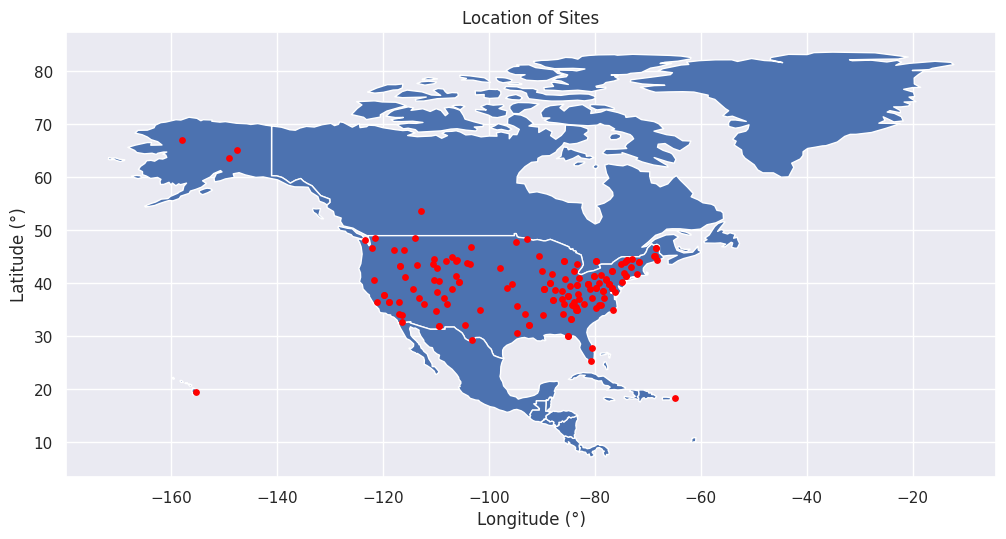

In [ ]:
geometry = [Point(xy) for xy in zip(df_site['LONGITUDE'], df_site['LATITUDE'])]
gdf = GeoDataFrame(df_site[["LATITUDE", "LONGITUDE"]], geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.loc[world['continent'] == 'North America']

plt.figure(figsize=(12,10))
gdf.plot(ax=world.plot(figsize=(12,10)), marker='o', color='red', markersize=15)
plt.title("Location of Sites")
plt.ylabel("Latitude (°)")
plt.xlabel("Longitude (°)")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


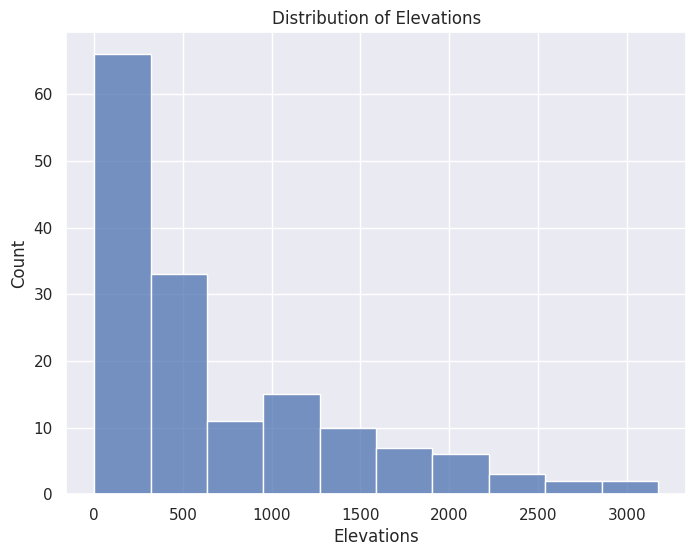

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.histplot(data=df_site, x="ELEVATION")
plt.title("Distribution of Elevations")
plt.xlabel("Elevations")
plt.show()

In [ ]:
df_site


,SITE_ID,SITE_NUM,SITE_NAME,ACTIVE,INACTIVE,AGENCY,STATE,COUNTY,TIME_ZONE,LATITUDE,LONGITUDE,ELEVATION,MAPID,LAND_USE,TERRAIN,MLM,NADP_ID,NADP_DISTANCE,UPDATE_DATE
0,ABT147,147,Abington,domp,w,EPA,CT,Windham,EA,41.840460,-72.010368,202.0,"Hampton, CT",Urban/Agric,Rolling,Mixed,CT15,0.0560,2020-01-30 13:25:29
1,ACA416,416,Acadia NP,dom,NaN,NPS,ME,Hancock,EA,44.377086,-68.260800,158.0,NaN,Forest,Rolling,Mixed,ME98,0.0130,2020-01-30 13:25:29
2,ALB801,801,Elk Island,dm,NaN,EPA,AB,Improvement Dist 13,MO,53.682400,-112.868000,711.0,NaN,Forest,Flat,Yes,AB35,0.0000,2023-04-11 00:00:00
3,ALC188,188,Alabama-Coushatta Tribe of Texas,dom,NaN,EPA,TX,Polk,CE,30.701577,-94.674011,105.0,NaN,Prairie,Rolling,Yes,TX41,0.0800,2023-02-21 14:21:31
4,ALH157,157,Alhambra,NaN,dompw,EPA,IL,Madison,CE,38.869000,-89.622800,164.0,"Pocohantas, IL",Agric,Flat,Yes,IL46,0.0782,2014-02-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,WST109,109,Woodstock,dom,NaN,EPA,NH,Grafton,EA,43.944519,-71.700787,255.0,"Woodstock, NH",Forest,Complex,No,NH02,0.2170,2020-01-30 13:25:29
152,YEL408,408,Yellowstone NP,dom,NaN,NPS,WY,Teton,MO,44.565356,-110.400338,2430.0,NaN,Agric,Rolling,No,WY08,39.0650,2020-01-30 13:25:29
153,YOS204,204,Yosemite NP Collocated,NaN,o,NPS,CA,Mariposa,PA,37.713300,-119.706100,1605.0,NaN,Forest,Complex,No,CA99,16.2440,2020-01-30 13:25:29
154,YOS404,404,Yosemite NP - Turtleback Dome,dom,NaN,NPS,CA,Mariposa,PA,37.713251,-119.706196,1605.0,NaN,Forest,Complex,No,CA99,16.2410,2020-01-30 13:25:29


## Filter for columns we actually need

In [ ]:
df_site = df_site[["SITE_ID", "LATITUDE", "LONGITUDE", "ELEVATION", "LAND_USE", "TERRAIN"]]
display(df_site.head())

,SITE_ID,LATITUDE,LONGITUDE,ELEVATION,LAND_USE,TERRAIN
0,ABT147,41.840460,-72.010368,202.0,Urban/Agric,Rolling
1,ACA416,44.377086,-68.260800,158.0,Forest,Rolling
2,ALB801,53.682400,-112.868000,711.0,Forest,Flat
3,ALC188,30.701577,-94.674011,105.0,Prairie,Rolling
4,ALH157,38.869000,-89.622800,164.0,Agric,Flat


# Hourly Gas Data

In [ ]:
gas_file = os.path.join(file_directory, "hourly_gas_combined.snappy.parquet")
df_gas = pd.read_parquet(gas_file,
                         engine="pyarrow",
                         dtype_backend="pyarrow")
print(f"Count of rows for gas is {df_gas.shape[0]}")

Count of rows for gas is 3067389


## Plots

In [ ]:
title = lambda x: f"Count of Values {x}"

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


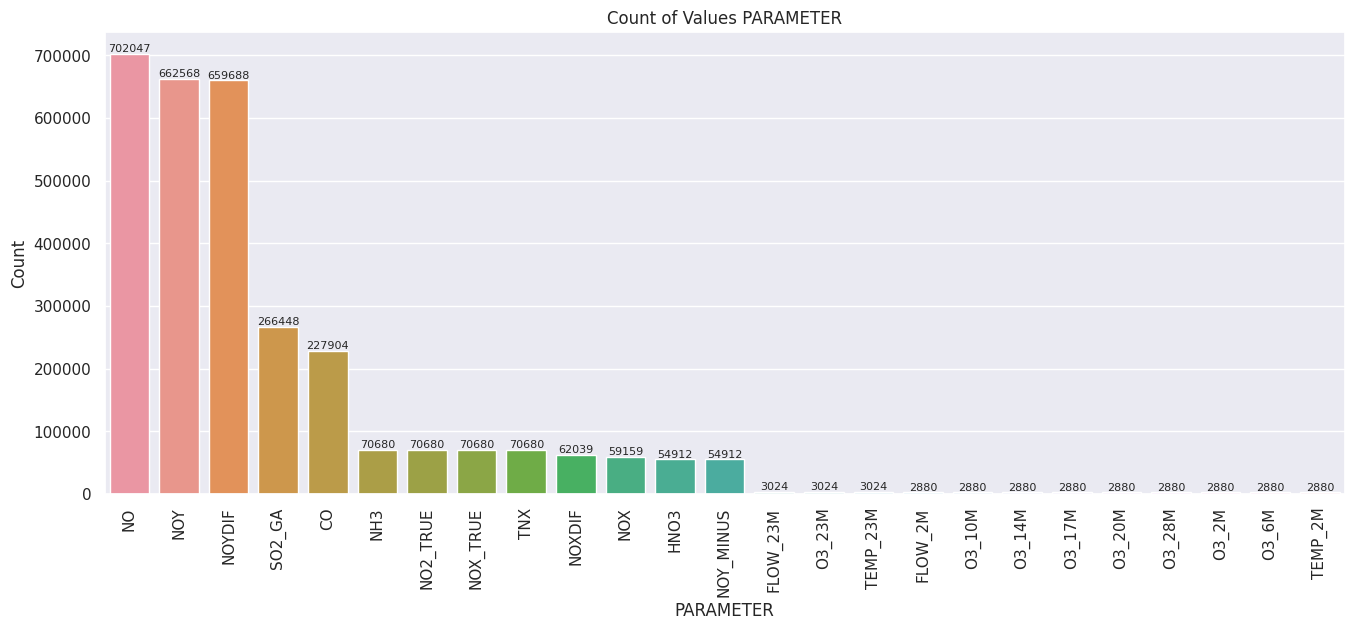

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=df_gas,
              x="PARAMETER",
              order=df_gas["PARAMETER"].value_counts().index)
ax.bar_label(ax.containers[0], fmt="%d", fontsize=8)
ax.set_title(title("PARAMETER"))
ax.set(xlabel="PARAMETER", ylabel="Count")
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


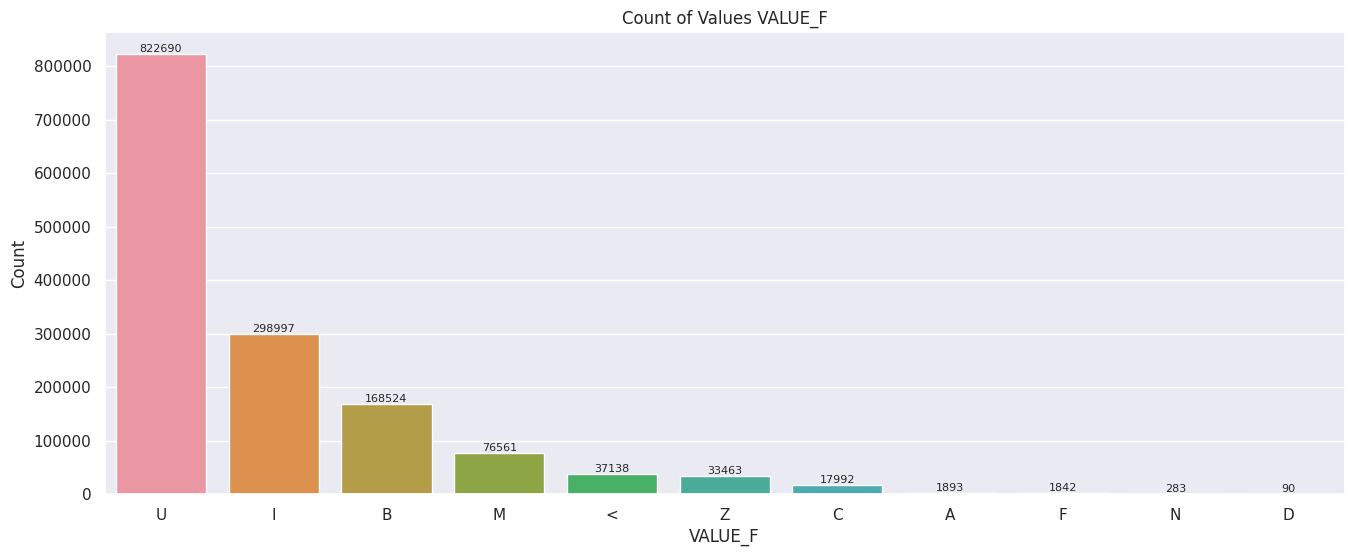

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))

# add NULL

sns.countplot(data=df_gas,
              x="VALUE_F",
              order=df_gas["VALUE_F"].value_counts(dropna=False).index)
ax.bar_label(ax.containers[0], fmt="%d", fontsize=8)
ax.set_title(title("VALUE_F"))
ax.set(xlabel="VALUE_F", ylabel="Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


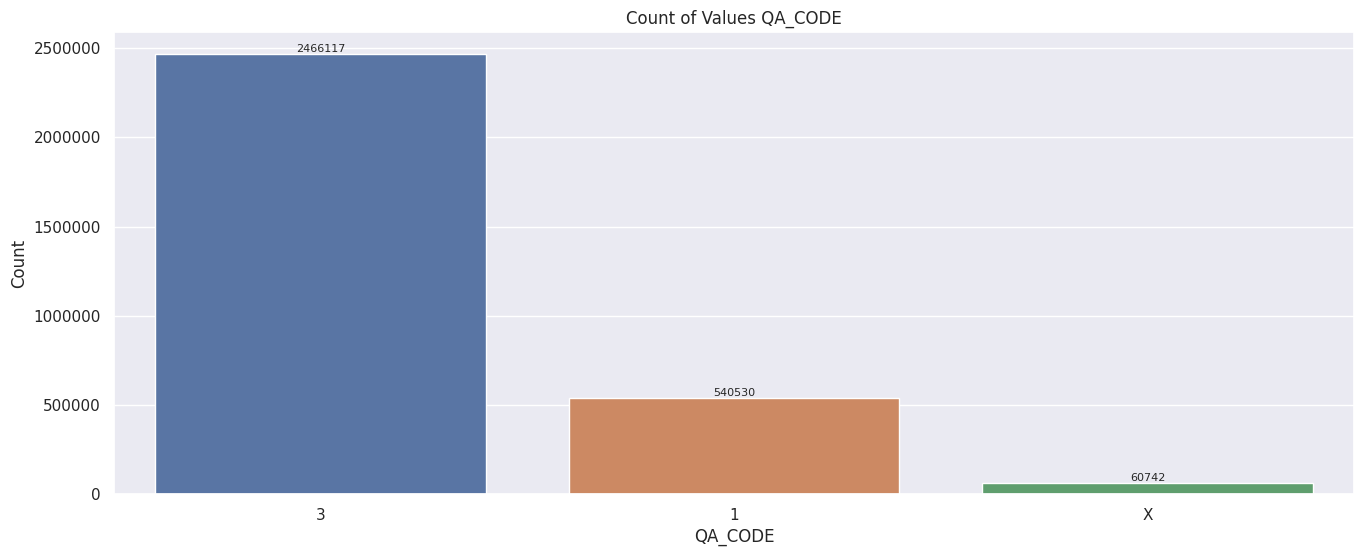

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=df_gas,
              x="QA_CODE",
              order=df_gas["QA_CODE"].value_counts().index)
ax.bar_label(ax.containers[0], fmt="%d", fontsize=8)
ax.set_title(title("QA_CODE"))
ax.set(xlabel="QA_CODE", ylabel="Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Filter data

In [ ]:
df_gas["PARAMETER"].value_counts(dropna=False)

PARAMETER
NO           702047
NOY          662568
NOYDIF       659688
SO2_GA       266448
CO           227904
NH3           70680
NO2_TRUE      70680
NOX_TRUE      70680
TNX           70680
NOXDIF        62039
NOX           59159
HNO3          54912
NOY_MINUS     54912
FLOW_23M       3024
O3_23M         3024
TEMP_23M       3024
FLOW_2M        2880
O3_10M         2880
O3_14M         2880
O3_17M         2880
O3_20M         2880
O3_28M         2880
O3_2M          2880
O3_6M          2880
TEMP_2M        2880
Name: count, dtype: int64[pyarrow]

In [ ]:
df_gas

,SITE_ID,DATE_TIME,PARAMETER,VALUE,VALUE_F,QA_CODE,UPDATE_DATE,Filename
0,BVL130,2020-01-01 00:00:00,CO,270.3000,I,3,2020-01-01 00:00:00,hourly_gas_2020.csv
1,BVL130,2020-01-01 00:00:00,NO,0.0220,U,3,2020-01-01 00:00:00,hourly_gas_2020.csv
2,BVL130,2020-01-01 00:00:00,NOY,2.1780,<NA>,3,2020-01-01 00:00:00,hourly_gas_2020.csv
3,BVL130,2020-01-01 00:00:00,NOYDIF,2.1550,<NA>,3,2020-01-01 00:00:00,hourly_gas_2020.csv
4,BVL130,2020-01-01 00:00:00,SO2_GA,0.3730,U,3,2020-01-01 00:00:00,hourly_gas_2020.csv
...,...,...,...,...,...,...,...,...
3067384,ROM206,2014-12-31 22:00:00,NOY,1.2390,<NA>,3,2014-12-31 22:00:00,hourly_gas_2014.csv
3067385,ROM206,2014-12-31 22:00:00,NOYDIF,1.1270,<NA>,3,2014-12-31 22:00:00,hourly_gas_2014.csv
3067386,ROM206,2014-12-31 23:00:00,NO,0.1630,U,3,2014-12-31 23:00:00,hourly_gas_2014.csv
3067387,ROM206,2014-12-31 23:00:00,NOY,1.8980,<NA>,3,2014-12-31 23:00:00,hourly_gas_2014.csv


In [ ]:
# We only want valid readings
df_gas = df_gas[df_gas["VALUE_F"].isnull()] # "D", "N", "F", "A", "C", "M", "I"

parameters_of_interest = ['NOYDIF',
 'NOY',
 'NO',
 'SO2_GA',
 'CO',
 'NOXDIF',
 'NOX',
 'TNX',
 'NOX_TRUE',
 'NO2_TRUE',
 'NOY_MINUS',
 'NH3']

# parameters_of_interest = [
#  'NH3']
df_gas = df_gas[df_gas["PARAMETER"].isin(parameters_of_interest)]

df_gas = df_gas[df_gas["QA_CODE"].isin(["1", "3"])]
df_gas = df_gas[["SITE_ID", "DATE_TIME", "PARAMETER", "VALUE"]]
df_gas["SITE_ID"] = df_gas["SITE_ID"].astype("category")
df_gas["PARAMETER"] = df_gas["PARAMETER"].astype("category")
df_gas = df_gas.reset_index(drop=True)
print(f"Count of rows for gas is {df_gas.shape[0]}")

Count of rows for gas is 1572862


In [ ]:
# Check count of rows based off PK before pivot
pk = df_gas.groupby(["SITE_ID", "DATE_TIME"]).size().reset_index(name="counts")
pk = pk[pk["counts"] > 0]
pk.shape[0]

<ipython-input-360-8ff41767a356>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pk = df_gas.groupby(["SITE_ID", "DATE_TIME"]).size().reset_index(name="counts")


583835

In [ ]:
start = time.perf_counter()

df_gas = df_gas.fillna(value = {"VALUE": -999999})
df_gas = pd.pivot_table(df_gas, values="VALUE", index=["SITE_ID", "DATE_TIME"], columns=["PARAMETER"], fill_value=np.nan).reset_index().rename_axis(None, axis=1)

print(time.perf_counter() - start)

print(f"Count of rows for gas after pivot is {df_gas.shape[0]}")
for column in parameters_of_interest:
  df_gas[column] = df_gas[[column]].replace({-999999: np.nan})

212.37388008200105
Count of rows for gas after pivot is 583835


In [ ]:
df_gas

,SITE_ID,DATE_TIME,CO,NH3,NO,NO2_TRUE,NOX,NOXDIF,NOX_TRUE,NOY,NOYDIF,NOY_MINUS,SO2_GA,TNX
0,BEL116,2013-01-01 08:00:00,<NA>,<NA>,3.4770,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,BEL116,2013-01-01 09:00:00,<NA>,<NA>,2.9020,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,BEL116,2013-01-01 14:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.6230,<NA>
3,BEL116,2013-01-01 15:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2.3140,<NA>
4,BEL116,2013-01-01 16:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2.4110,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583830,ROM206,2022-12-31 19:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0980,<NA>,<NA>,<NA>
583831,ROM206,2022-12-31 20:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.1720,<NA>,<NA>,<NA>
583832,ROM206,2022-12-31 21:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.3150,<NA>,<NA>,<NA>
583833,ROM206,2022-12-31 22:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.7550,<NA>,<NA>,<NA>
